In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1a)

In [2]:
data = pd.read_csv('C:/Users/ldmag/Downloads/tree_ex.csv', header=None, names=['y', 'x1', 'x2'])

In [3]:
def get_RSS(data, j, s):
    R1 = data[data.iloc[:,j] < s]
    R2 = data[data.iloc[:,j] >= s]

    # mean response
    mR1 = R1.iloc[:, 0].mean()
    mR2 = R2.iloc[:, 0].mean()

    # RSS for each region
    r1_rss = np.sum((R1.iloc[:, 0] - mR1)**2)
    r2_rss = np.sum((R2.iloc[:, 0] - mR2)**2)
    total = r1_rss + r2_rss

    return total, R1, R2

In [4]:
result, _, _ = get_RSS(data, j=2, s=0)
print('The RSS value for j=2 and s=0 is', result.round(2))

The RSS value for j=2 and s=0 is 366.08


### 1b)

In [5]:
# set a uniform grid
j = 1
grid = np.linspace(0,10,100)
s_optimal = None # we don't know this so set to nothing
bench = float('inf') # use this to update rss

for s in grid:
    rss, _, _ = get_RSS(data, j, s)
    if rss < bench:
        bench = rss
        s_optimal = s

In [6]:
print('The minimum RSS value is identified as', bench.round(2))
print('Value of "s" for min(RSS) for j is', s_optimal.round(2))

The minimum RSS value is identified as 346.94
Value of "s" for min(RSS) for j is 6.97


### 1c)

In [7]:
j = 2
grid = np.linspace(-5,5,100)
s_optimal = None
bench = float('inf')
fR1 = None
fR2 = None

for s in grid:
    rss, r1, r2 = get_RSS(data, j, s)
    if rss < bench:
        bench = rss
        s_optimal = s
        fR1 = r1
        fR2 = r2

In [8]:
print('The minimum RSS value is identified as', bench.round(2))
print('Value of "s" for min(RSS) for j is', s_optimal.round(2))
print('R1(j,s):', fR1)
print('R2(j,s):', fR2)

The minimum RSS value is identified as 209.63
Value of "s" for min(RSS) for j is 2.98
R1(j,s):            y       x1        x2
1    3.34210  0.91506 -2.812500
2    0.89695  8.00490 -3.372900
3    2.25870  7.59420 -2.233600
4    2.05750  7.42950 -2.214500
5    2.41200  8.07340 -3.400100
..       ...      ...       ...
494  1.70600  9.89560 -3.617200
495  3.00480  2.79960 -0.054027
497  3.11550  6.01040  1.197500
498  2.47030  9.31330 -0.969490
499  1.90960  9.84910  1.988500

[406 rows x 3 columns]
R2(j,s):            y      x1      x2
0    1.93660  7.8806  4.3034
14   0.23365  4.4923  4.9978
24   0.73837  4.2158  3.9068
26   1.23320  2.1701  4.6607
27   1.34470  3.6885  4.2657
..       ...     ...     ...
486  1.39730  4.6659  3.5132
488  1.25470  6.5712  3.6312
489  0.81549  6.0789  3.2098
492  0.27046  8.4300  4.0940
496 -0.35136  3.8723  4.2823

[94 rows x 3 columns]


### 2a)

In [9]:
from ISLP import load_data

df = load_data('carseats')

In [10]:
df.dtypes[df.dtypes == 'object'].index

Index(['ShelveLoc', 'Urban', 'US'], dtype='object')

In [11]:
# preprocess
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
for i in df.dtypes[df.dtypes == 'object'].index:
    df[i] = encoder.fit_transform(df[i].values.reshape(-1,1))

In [12]:
# split
train_data = df.iloc[0:300,:]
test_data = df.iloc[300:,:]

In [13]:
# split into parts
X_train = train_data.drop('Sales', axis=1)
Y_train = train_data['Sales']
X_test = test_data.drop('Sales', axis=1)
Y_test = test_data['Sales']

In [14]:
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz, export_text
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

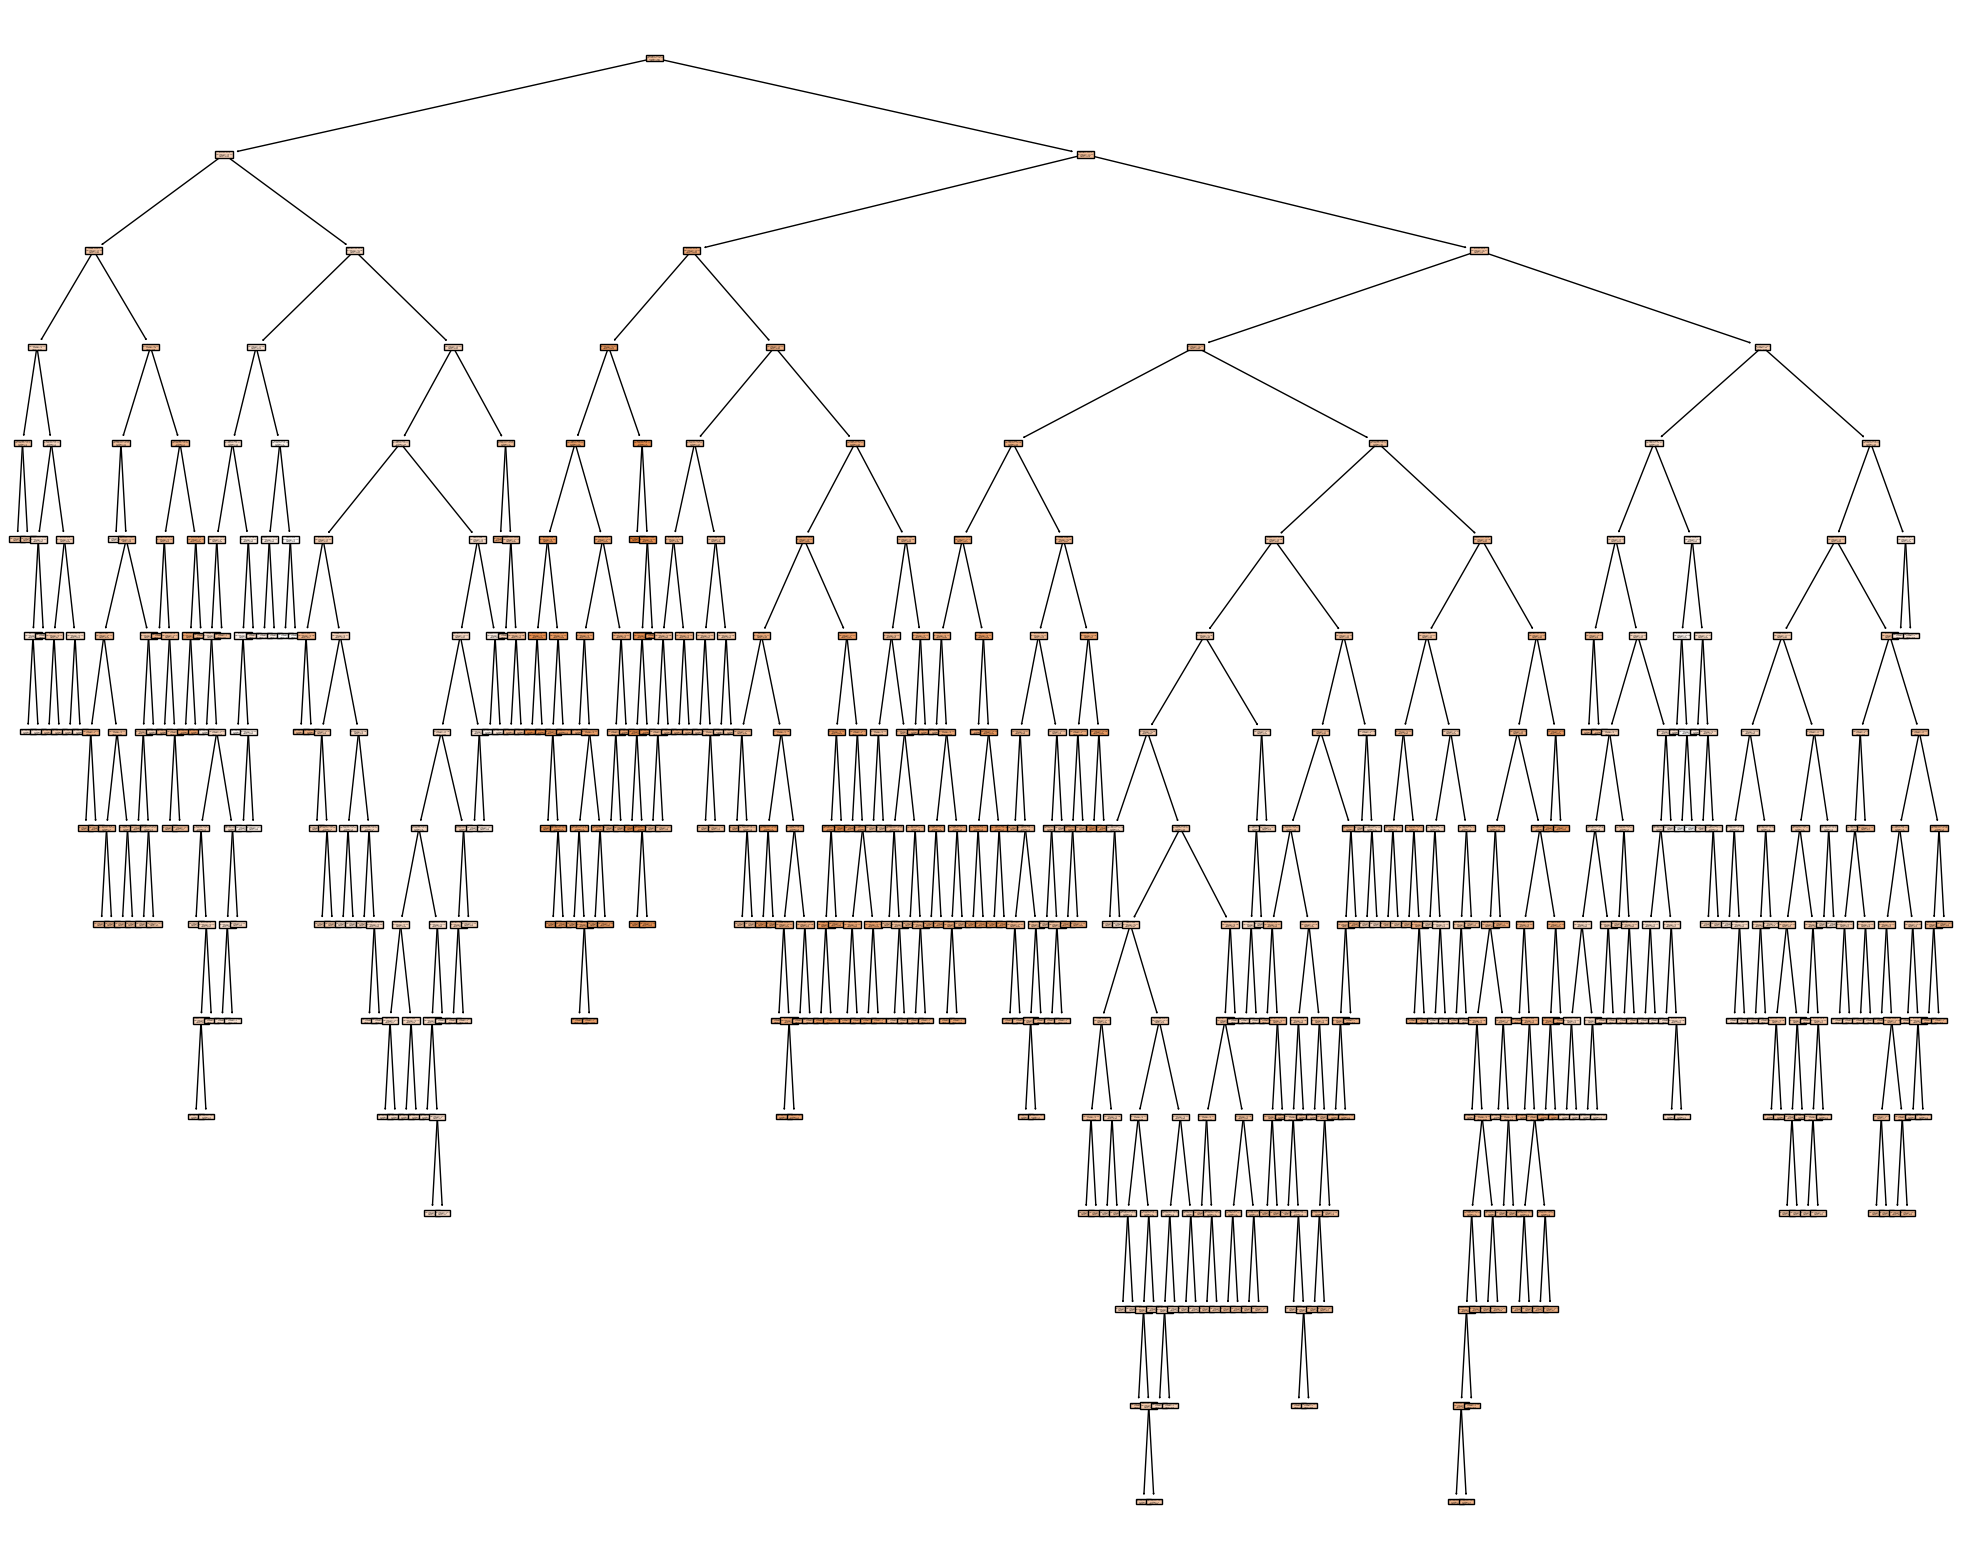

In [15]:
# plot tree
plt.figure(figsize=(25,20))
plot_tree(model, filled=True, feature_names=X_train.columns)
plt.show()

I can't make heads or tails of this.

In [16]:
text = export_text(model)
print(text)

|--- feature_5 <= 0.50
|   |--- feature_4 <= 102.50
|   |   |--- feature_1 <= 53.00
|   |   |   |--- feature_6 <= 50.00
|   |   |   |   |--- feature_2 <= 2.00
|   |   |   |   |   |--- value: [6.68]
|   |   |   |   |--- feature_2 >  2.00
|   |   |   |   |   |--- value: [6.88]
|   |   |   |--- feature_6 >  50.00
|   |   |   |   |--- feature_4 <= 95.00
|   |   |   |   |   |--- feature_0 <= 108.50
|   |   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |   |--- value: [3.47]
|   |   |   |   |   |   |--- feature_9 >  0.50
|   |   |   |   |   |   |   |--- value: [3.02]
|   |   |   |   |   |--- feature_0 >  108.50
|   |   |   |   |   |   |--- value: [4.42]
|   |   |   |   |--- feature_4 >  95.00
|   |   |   |   |   |--- feature_4 <= 97.00
|   |   |   |   |   |   |--- feature_8 <= 0.50
|   |   |   |   |   |   |   |--- value: [6.97]
|   |   |   |   |   |   |--- feature_8 >  0.50
|   |   |   |   |   |   |   |--- value: [6.03]
|   |   |   |   |   |--- feature_4 >  97.00
|   |   |  

Nope, not this either. Could use graphviz.

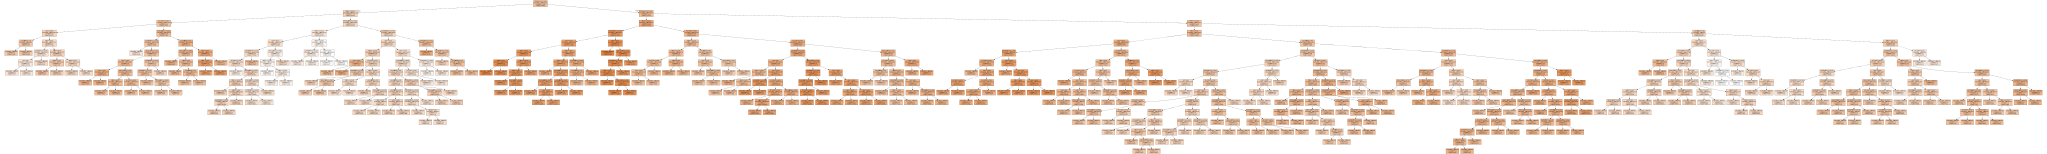

In [17]:
import graphviz as gviz
dot = export_graphviz(model, out_file=None, feature_names=X_train.columns, filled=True)
gviz.Source(dot, format='png')

So trees are only interpretable if they are short (opinion). This particular , untuned and unpruned tree has about 300 leaves in total. The rule of thumb for interpretation is that, if a feature is bigger or smaller than a thereshold 'c' and 'd'; then the predicted outcome is the mean of the value 'y' of the instances within a node.

For example, if ShelveLoc <= 0.5 where squared error = 8.012, with samples = 300 is true, then price is <= 102.5 and population <= 171.5 with value 4.522.
Reaching the leaves: If population <= 171.5 (error=4.588) and CompPrice <= 144 (error=3.66), and Age <= 44, then the value = 4.113.

In [18]:
model.get_n_leaves()

300

In [19]:
# get predictions and see error
y_pred = model.predict(X_test)

# get error (MSE)
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('MAE:', mean_absolute_error(Y_test, y_pred).round(2))
print('MSE:', mean_squared_error(Y_test, y_pred).round(2))


MAE: 2.03
MSE: 6.12


### 2b)

In [20]:
model = DecisionTreeRegressor().cost_complexity_pruning_path(X_train, Y_train)
alphas = model.ccp_alphas
impurities = model.impurities

In [26]:
# need alphas to find optimal alpha, so looping through the results from the previous cell might work
mod_iter = []
for i in alphas:
    model = DecisionTreeRegressor(random_state=42, ccp_alpha=i)
    model.fit(X_train, Y_train)
    mod_iter.append(model)

In [27]:
# crossvalidate; use average error
from sklearn.model_selection import cross_val_score

cv = [np.mean(cross_val_score(mod, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')) for mod in mod_iter]

In [30]:
# finding optimal params
tree_index = np.argmin(cv)
ccp_alpha = alphas[tree_index]
tree_size = len(np.where(mod_iter[tree_index].tree_.threshold != -2)[0])

# print tree size
print('Optimal tree size is given as', tree_size)

Optimal tree size is given as 2


In [31]:
# fit to new tree
model2 = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
model2.fit(X_train, Y_train)
y_pred = model2.predict(X_test)

# error rates
print('MAE:', mean_absolute_error(Y_test, y_pred).round(2))
print('MSE:', mean_squared_error(Y_test, y_pred).round(2))

MAE: 1.85
MSE: 5.51


### 2c)

In [32]:
from sklearn.ensemble import RandomForestRegressor

model3 = RandomForestRegressor(max_features=5, random_state=42) # set max features per split to 5
model3.fit(X_train, Y_train)
y_pred = model3.predict(X_test)

# get feature importance
importances = model3.feature_importances_
var_index = np.argmax(importances)
var_imp = X_train.columns[var_index]

# print error
print('MAE:', mean_absolute_error(Y_test, y_pred).round(2))
print('MSE:', mean_squared_error(Y_test, y_pred).round(2))

print('The most important variable by feature importance is:', var_imp)

MAE: 1.29
MSE: 2.56
The most important variable by feature importance is: Price
